# Environment

### Env with **Pytorch 1.6** 

# Load KPs (See 4-2.)

In [1]:
import joblib
import glob
import matplotlib.pyplot as plt

In [2]:
LOAD_KPS_PTH = "predicted_kps" 

In [3]:
kps_filenames = sorted(glob.glob(f"{LOAD_KPS_PTH}/*]*.joblib"))
kps_filenames[:5] , kps_filenames[-5:]

(['predicted_kps/[0000]brush_hair.joblib',
  'predicted_kps/[0001]brush_hair.joblib',
  'predicted_kps/[0002]brush_hair.joblib',
  'predicted_kps/[0003]brush_hair.joblib',
  'predicted_kps/[0004]brush_hair.joblib'],
 ['predicted_kps/[6761]wave.joblib',
  'predicted_kps/[6762]wave.joblib',
  'predicted_kps/[6763]wave.joblib',
  'predicted_kps/[6764]wave.joblib',
  'predicted_kps/[6765]wave.joblib'])

In [4]:
info_d = joblib.load(kps_filenames[1])
info_d.keys()

dict_keys(['width', 'height', 'frames_per_second', 'num_frames', 'num_role_register', 'boxes_buffer', 'kps_buffer', 'roles_buffer', 'frames_split_pos', 'cost_matrix_collection', 'image_size', 'bbox_area_by_role', 'num_frames_by_role', 'motion_distance_by_role', 'frames_by_role', 'completeness_by_role', 'selected_roles', 'boxes_buffer_selected', 'kps_buffer_selected'])

In [5]:
info_d['num_frames'], info_d['kps_buffer'].shape, info_d['kps_buffer_selected'].shape

(395, (394, 17, 3), (394, 1, 17, 3))

In [6]:
for kpfn in kps_filenames[:5]:
    info_d = joblib.load(kpfn)
    print(kpfn)
    #print(info_d.keys())
    print(info_d['num_frames'], info_d['kps_buffer'].shape, info_d['kps_buffer_selected'].shape)
    print('  - num_role_register: ',info_d['num_role_register'])
    #print('  - num_frames_by_role: ', info_d['num_frames_by_role'])
    #print('  - motion_distance_by_role: ', info_d['motion_distance_by_role'])
    #print('  - completeness_by_role: ', info_d['completeness_by_role'])
    print('  - selected_roles: ', info_d['selected_roles'])
    print('*'*64)

predicted_kps/[0000]brush_hair.joblib
409 (415, 17, 3) (408, 1, 17, 3)
  - num_role_register:  6
  - selected_roles:  [0]
****************************************************************
predicted_kps/[0001]brush_hair.joblib
395 (394, 17, 3) (394, 1, 17, 3)
  - num_role_register:  1
  - selected_roles:  [0]
****************************************************************
predicted_kps/[0002]brush_hair.joblib
323 (322, 17, 3) (322, 1, 17, 3)
  - num_role_register:  1
  - selected_roles:  [0]
****************************************************************
predicted_kps/[0003]brush_hair.joblib
246 (281, 17, 3) (245, 1, 17, 3)
  - num_role_register:  26
  - selected_roles:  [7]
****************************************************************
predicted_kps/[0004]brush_hair.joblib
159 (169, 17, 3) (158, 1, 17, 3)
  - num_role_register:  6
  - selected_roles:  [0]
****************************************************************


# Get num_roles for each Video 

In [7]:
import tqdm
num_roles_by_video = {}

for j, kpfn in enumerate(tqdm.tqdm(kps_filenames)):
        id_, class_ = kpfn.split('/')[-1].split('.')[0][1:].split(']') # "6765", "wave"
        #print(id_, class_)
        info_d = joblib.load(kpfn)
        n_roles = len(info_d['num_frames_by_role'])
        id_ = int(id_)
        num_roles_by_video.update({id_:n_roles})
        
#joblib.dump(video_selected, f"demo/video_selected.joblib")
#joblib.dump(num_roles_by_video, f"demo/num_roles_by_video.joblib")
#video_selected = joblib.load(f"demo/video_selected.joblib")
#num_roles_by_video = joblib.load(f"demo/num_roles_by_video.joblib")

100%|██████████| 5796/5796 [00:28<00:00, 201.53it/s]


In [8]:
print(f"共有[{len(num_roles_by_video)}]支成功辨識的video")

共有[5796]支成功辨識的video


# Load Dataset Overview (See 3.)

In [9]:
import pandas as pd

In [10]:
video_info_df = pd.read_csv("demo/video_info.csv", index_col=0)
video_info_df.head()

,filename,class,width,height,frames_per_second,num_frames
0,April_09_brush_hair_u_nm_np1_ba_goo_0.avi,brush_hair,320,240,30.0,409
1,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,brush_hair,320,240,30.0,395
2,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,brush_hair,320,240,30.0,323
3,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,brush_hair,416,240,30.0,246
4,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,brush_hair,416,240,30.0,159


In [11]:
import numpy as np
video_info_df['num_roles_in_video'] = \
    [ int(num_roles_by_video[i]) if i in num_roles_by_video.keys() else np.nan  
      for i in range(video_info_df.shape[0]) ]
video_info_df.head()

,filename,class,width,height,frames_per_second,num_frames,num_roles_in_video
0,April_09_brush_hair_u_nm_np1_ba_goo_0.avi,brush_hair,320,240,30.0,409,6.0
1,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,brush_hair,320,240,30.0,395,1.0
2,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,brush_hair,320,240,30.0,323,1.0
3,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,brush_hair,416,240,30.0,246,26.0
4,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,brush_hair,416,240,30.0,159,6.0


In [12]:
video_info_df.dropna(inplace=True)

(array([4.844e+03, 6.880e+02, 1.790e+02, 6.000e+01, 1.500e+01, 4.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  19. ,  123.4,  227.8,  332.2,  436.6,  541. ,  645.4,  749.8,
         854.2,  958.6, 1063. ]),
 <a list of 10 Patch objects>)

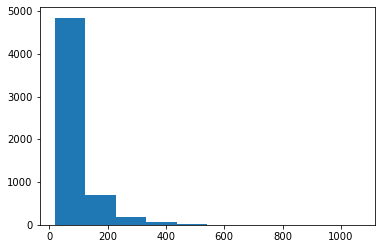

In [13]:
plt.hist(video_info_df['num_frames'])

In [14]:
np.median(video_info_df['num_frames'])

80.0

In [15]:
class_count = video_info_df.groupby('class').count()['filename'].to_dict()
class_count

{'brush_hair': 86,
 'cartwheel': 89,
 'catch': 97,
 'chew': 106,
 'clap': 125,
 'climb': 70,
 'climb_stairs': 91,
 'dive': 84,
 'draw_sword': 98,
 'dribble': 139,
 'drink': 142,
 'eat': 95,
 'fall_floor': 93,
 'fencing': 112,
 'flic_flac': 59,
 'golf': 104,
 'handstand': 99,
 'hit': 106,
 'hug': 116,
 'jump': 117,
 'kick': 116,
 'kick_ball': 105,
 'kiss': 80,
 'laugh': 125,
 'pick': 95,
 'pour': 101,
 'pullup': 95,
 'punch': 96,
 'push': 94,
 'pushup': 81,
 'ride_bike': 79,
 'ride_horse': 74,
 'run': 159,
 'shake_hands': 161,
 'shoot_ball': 126,
 'shoot_bow': 103,
 'shoot_gun': 90,
 'sit': 127,
 'situp': 88,
 'smile': 94,
 'smoke': 103,
 'somersault': 111,
 'stand': 130,
 'swing_baseball': 134,
 'sword': 110,
 'sword_exercise': 116,
 'talk': 106,
 'throw': 91,
 'turn': 223,
 'walk': 460,
 'wave': 95}

In [16]:
class_selected = []
for c in class_count:
    if class_count[c]>20:
        class_selected.append(c)
len(class_selected)

51

In [17]:
class_selected

['brush_hair',
 'cartwheel',
 'catch',
 'chew',
 'clap',
 'climb',
 'climb_stairs',
 'dive',
 'draw_sword',
 'dribble',
 'drink',
 'eat',
 'fall_floor',
 'fencing',
 'flic_flac',
 'golf',
 'handstand',
 'hit',
 'hug',
 'jump',
 'kick',
 'kick_ball',
 'kiss',
 'laugh',
 'pick',
 'pour',
 'pullup',
 'punch',
 'push',
 'pushup',
 'ride_bike',
 'ride_horse',
 'run',
 'shake_hands',
 'shoot_ball',
 'shoot_bow',
 'shoot_gun',
 'sit',
 'situp',
 'smile',
 'smoke',
 'somersault',
 'stand',
 'swing_baseball',
 'sword',
 'sword_exercise',
 'talk',
 'throw',
 'turn',
 'walk',
 'wave']

In [18]:
target = video_info_df['class'].apply(lambda c: class_selected.index(c)).values
target 

array([ 0,  0,  0, ..., 50, 50, 50])

In [19]:
video_info_df['num_frames'].min()

19

# Get KPs of Selected Video 

In [20]:
sample_num_frames = 80 # seq_len 
kps_ = []
for i in video_info_df.index:
    row = video_info_df.loc[i]
    id_, class_ = str(i).zfill(4), row['class']
    info_d = joblib.load(f"{LOAD_KPS_PTH}/[{id_}]{class_}.joblib")
    kps = info_d['kps_buffer_selected']
    #print(id_, class_, kps.shape)
    num_frames = kps.shape[0]
    if num_frames>=sample_num_frames:
        np.random.seed(123)
        a1 = np.random.permutation(range(num_frames))
        idx = np.sort(a1[:sample_num_frames]) 
    else:
        np.random.seed(123)
        a1 = np.random.permutation(range(num_frames))
        a2 = np.random.choice(range(num_frames),sample_num_frames-num_frames)
        idx = np.sort( np.concatenate([a1,a2]) )         
    #print(idx)
    kps = kps[idx]
    #print(id_, class_, kps.shape)
    kps[:,:,:,0] /= row['width']
    kps[:,:,:,1] /= row['height']
    kps_.append(kps[:,:,:,:2])
kps_ = np.stack(kps_,0)
kps_.shape

(5796, 80, 1, 17, 2)

In [21]:
kps_.max(), kps_.min()

(0.999628, -0.0056818184)

In [22]:
kps_ = kps_.reshape(*kps_.shape[:2], -1)
kps_.shape

(5796, 80, 34)

# Prepare Dataset  using PyTorch

In [23]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

target_catag = to_categorical(target, len(class_selected))
target_catag.shape

(5796, 51)

In [34]:
from sklearn.model_selection import train_test_split
target_catag_train, target_catag_test, target_train, target_test, input_train, input_test = \
    train_test_split(target_catag, target, kps_, test_size=0.3, random_state=42)
target_catag_train.shape, target_catag_test.shape, target_train.shape, target_test.shape, \
input_train.shape, input_test.shape

((4057, 51), (1739, 51), (4057,), (1739,), (4057, 80, 34), (1739, 80, 34))

In [35]:
import torch 
target_catag_train, target_catag_test, target_train, target_test, input_train, input_test= \
map(torch.FloatTensor, [target_catag_train, target_catag_test, target_train, target_test, input_train, input_test]) 

In [36]:
from torch.utils.data import Dataset, DataLoader
class KPsDataset(Dataset):
    def __init__(self, input_train, target_catag_train, transform=None):
        self.X = input_train
        self.y = target_catag_train

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [44]:
train_dataset =  KPsDataset(input_train, target_catag_train)
train_loader = DataLoader(train_dataset, batch_size=128, 
                           pin_memory=True)

In [38]:
for x,y in train_loader:
    print(x.shape,y.shape); break

torch.Size([32, 80, 34]) torch.Size([32, 51])


# Build RNN Model using PyTorch

In [39]:
import torch 
import torch.nn as nn 

In [40]:
class ActionClassifier(nn.Module):
    def __init__(self, 
                 num_classes = len(class_selected),
                 input_size = 34, 
                 hidden_size = 128, 
                 num_layers=2,
                 random_seed = 12345678,
                 device="cpu"
                ):
        super().__init__()
        self.num_layers = num_layers
        self.device = device
        self.random_seed = random_seed
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers=num_layers, dropout=0.7)        
        self.cls = nn.Linear(hidden_size*2, num_classes)
        
    def forward(self , input_): # input_: (seq_len, batch_size, input_size) 
        seq_len, batch_size, input_size = input_.shape
        assert input_size==self.input_size
        torch.random.manual_seed(self.random_seed)
        h0 = torch.rand(self.num_layers, batch_size, self.hidden_size).to(self.device)
        torch.random.manual_seed(self.random_seed)
        c0 = torch.rand(self.num_layers, batch_size, self.hidden_size).to(self.device)
        #print(h0.shape, c0.shape)
        output, (hn, cn) = self.rnn(input_, (h0, c0))# output: (seq_len, batch_size, hidden_size)
        #print(hn.shape, cn.shape)
        #print(output.shape)
        output = torch.mean(output,0)# output: (batch_size, hidden_size)
        output = torch.cat([cn.mean(0),output],1)
        #print(output.shape)
        output = self.cls(output) # output: (batch_size, num_classes)
        #print(output.shape)
        return output

In [41]:
device = "cuda:0"

In [42]:
model = ActionClassifier(device=device).to(device)

In [43]:
epochs= 1000
loss_fn = nn.BCEWithLogitsLoss()
model.train()
for epo in range(epochs):
    if (epo//100)%2==0 :
        optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
    elif (epo//100)%2==1:
        optimizer = torch.optim.AdamW(model.parameters(), lr=3e-5)
        
    for X_train, y_train in train_loader:
        output_train = model(X_train.permute(1,0,2).to(device))#(1415, 31)
        loss = loss_fn(output_train, y_train.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if epo%20==19:
        model.eval()
        output_train = model(input_train.permute(1,0,2).to(device))#(1415, 31)
        accuracy_train = (torch.argmax(output_train.to('cpu'),1)==target_train).sum().numpy()/(target_train.shape[0])
        output_test = model(input_test.permute(1,0,2).to(device))#(1415, 31)
        accuracy_test = (torch.argmax(output_test.to('cpu'),1)==target_test).sum().numpy()/(target_test.shape[0])
        print("[{}] loss:{:.6f}, acc_train:{:4f}, acc_test:{:4f}".format(epo, loss.item(), accuracy_train, accuracy_test))
        model.train()

[19] loss:0.074668, acc_train:0.173774, acc_test:0.165037
[39] loss:0.065214, acc_train:0.274341, acc_test:0.235193
[59] loss:0.061392, acc_train:0.336209, acc_test:0.262795
[79] loss:0.068919, acc_train:0.415085, acc_test:0.285796
[99] loss:0.072347, acc_train:0.498891, acc_test:0.286371
[119] loss:0.073058, acc_train:0.579246, acc_test:0.303048
[139] loss:0.079677, acc_train:0.593049, acc_test:0.304198
[159] loss:0.078743, acc_train:0.601923, acc_test:0.297297
[179] loss:0.079037, acc_train:0.627311, acc_test:0.296722
[199] loss:0.077629, acc_train:0.639882, acc_test:0.303048
[219] loss:0.073370, acc_train:0.545970, acc_test:0.278896
[239] loss:0.066422, acc_train:0.635445, acc_test:0.285796
[259] loss:0.078438, acc_train:0.641114, acc_test:0.270270
[279] loss:0.080692, acc_train:0.674883, acc_test:0.277171
[299] loss:0.097183, acc_train:0.709638, acc_test:0.273145
[319] loss:0.085208, acc_train:0.829677, acc_test:0.304773
[339] loss:0.080225, acc_train:0.834853, acc_test:0.318574
[3

In [45]:
epochs= 1000
loss_fn = nn.BCEWithLogitsLoss()
model.train()
for epo in range(epochs):
    if epo<200 :
        optimizer = torch.optim.AdamW(model.parameters(), lr=5e-3)
    elif epo<500:
        optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4)
    else:
        optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)        
        
    for X_train, y_train in train_loader:
        output_train = model(X_train.permute(1,0,2).to(device))#(1415, 31)
        loss = loss_fn(output_train, y_train.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if epo%20==19:
        model.eval()
        output_train = model(input_train.permute(1,0,2).to(device))#(1415, 31)
        accuracy_train = (torch.argmax(output_train.to('cpu'),1)==target_train).sum().numpy()/(target_train.shape[0])
        output_test = model(input_test.permute(1,0,2).to(device))#(1415, 31)
        accuracy_test = (torch.argmax(output_test.to('cpu'),1)==target_test).sum().numpy()/(target_test.shape[0])
        print("[{}] loss:{:.6f}, acc_train:{:4f}, acc_test:{:4f}".format(epo, loss.item(), accuracy_train, accuracy_test))
        model.train()

[19] loss:0.071942, acc_train:0.390436, acc_test:0.276596
[39] loss:0.078308, acc_train:0.463643, acc_test:0.268545
[59] loss:0.080207, acc_train:0.510722, acc_test:0.274296
[79] loss:0.079274, acc_train:0.567907, acc_test:0.270270
[99] loss:0.081542, acc_train:0.553611, acc_test:0.255319
[119] loss:0.072337, acc_train:0.559773, acc_test:0.255894
[139] loss:0.067999, acc_train:0.563471, acc_test:0.253594
[159] loss:0.078404, acc_train:0.539808, acc_test:0.239793
[179] loss:0.062446, acc_train:0.528716, acc_test:0.226567
[199] loss:0.067423, acc_train:0.579985, acc_test:0.268545
[219] loss:0.045956, acc_train:0.675376, acc_test:0.276021
[239] loss:0.043753, acc_train:0.681785, acc_test:0.277746
[259] loss:0.033687, acc_train:0.678827, acc_test:0.277746
[279] loss:0.022841, acc_train:0.687207, acc_test:0.280046
[299] loss:0.022599, acc_train:0.682031, acc_test:0.275446
[319] loss:0.013867, acc_train:0.686714, acc_test:0.273145
[339] loss:0.012339, acc_train:0.690658, acc_test:0.280046
[3

In [ ]:
torch.save(model.state_dict(), "demo/model.torchmodel")